In [1]:
import numpy as np
import control
from pprint import pprint

import sys
sys.path.append('../')
from control_utils import *
from IPython.display import display, Markdown, Latex

In [2]:
R = 1
C = 1
T = 0.4


In [3]:
Gs = control.tf(1, [C*R, 1])
print(Gs)
Gz = control.c2d(Gs, T)
print(Gz)


  1
-----
s + 1


  0.3297
----------
z - 0.6703

dt = 0.4



Valor final ao step: 1.0


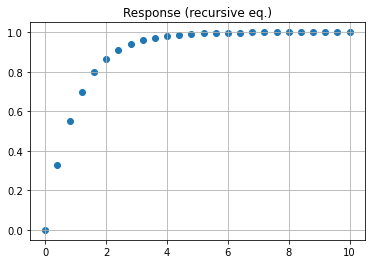

In [4]:
# Resposta ao step
print("Valor final ao step:", 0.3297/(1-0.6703))
tfinal = 10
x0, y0 = control.step_response(Gz, tfinal)
plt.scatter(x0,y0)
plt.title('Response (recursive eq.)')
plt.grid()

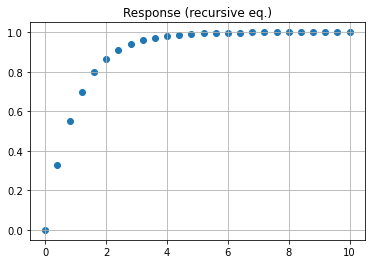

In [7]:
# Resposta ao step pela transformada inversa
from lcapy.discretetime import z
Xz2 = z/(z-1)
Gz2=0.3297/(z-0.6703) * Xz2
Gk=Gz2.IZT()

tfinal=10
k_max = int(np.ceil(tfinal/T)) + 1
y = np.empty(k_max)
for i in range(k_max):
    y[i] = Gk(i).fval
    
assert_almost_equal(y0, y)
plt.scatter(x0,y0)
plt.title('Response (recursive eq.)')
plt.grid()

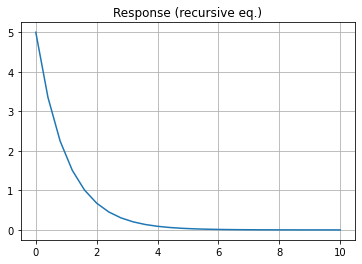

In [8]:
# c) A resposta de entrada zero para v(0)=5 V 
tfinal = 10

k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = np.zeros(k_max) #step
y = np.empty(k_max)
y[0] = 5
for n in range(1, k_max):
    y[n] = 0.3297*u[n-1] + 0.6703*y[n-1]
    
plt.plot(x,y)
plt.title('Response (recursive eq.)')
plt.grid()

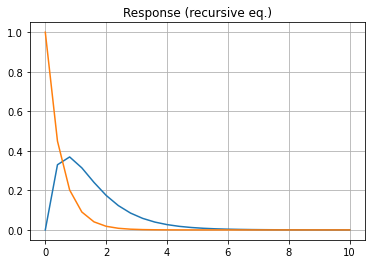

In [9]:
# A resposta de estado zero para vs = e^-2kT
tfinal = 10

k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = np.exp(-2*x)
y = np.empty(k_max)
y[0] = 0
for n in range(1, k_max):
    y[n] = 0.3297*u[n-1] + 0.6703*y[n-1]
    
plt.plot(x,y)
plt.plot(x,u)

plt.title('Response (recursive eq.)')
plt.grid()